Importing libraries

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


Loading the dataset from the folders using the pandas library

Using a bar plot, to check whether the dataset is balanced or not.

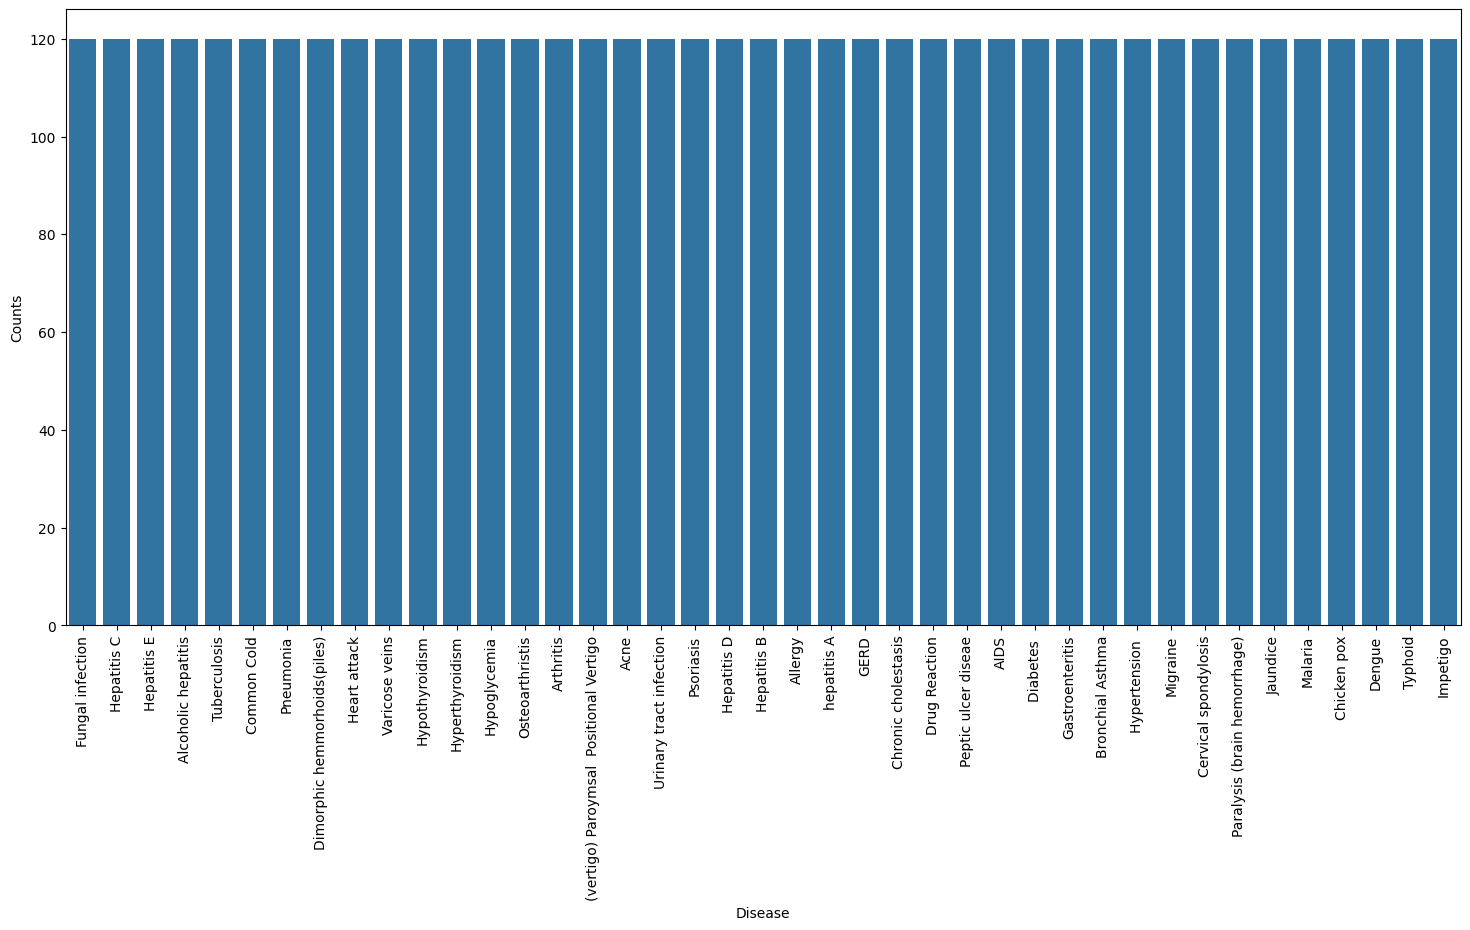

In [4]:
# Reading the train.csv by removing the 
# last column since it's an empty column
DATA_PATH = "data/training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


Can be observed that the dataset is a balanced dataset i.e. there are exactly 120 samples for each disease, and no further balancing is required

We will be using a label encoder to convert the prognosis column to the numerical datatype. Label Encoder converts the labels into numerical form by assigning a unique index to the labels. If the total number of labels is n, then the numbers assigned to each label will be between 0 to n-1.

In [5]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

Now that we have cleaned our data by removing the Null values and converting the labels to numerical format, It’s time to split the data to train and test the model. We will be splitting the data into 80:20

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


Will be using K-Fold cross-validation to evaluate the machine-learning models. We will be using Support Vector Classifier, Gaussian Naive Bayes Classifier, and Random Forest Classifier for cross-validation.

In [7]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Notice that all our machine learning algorithms are performing very well and the mean scores after k fold cross-validation are also very high. To build a robust model we can combine take the mode of the predictions of all three models so that even one of the models makes wrong predictions and the other two make correct predictions then the final output would be the correct one.

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


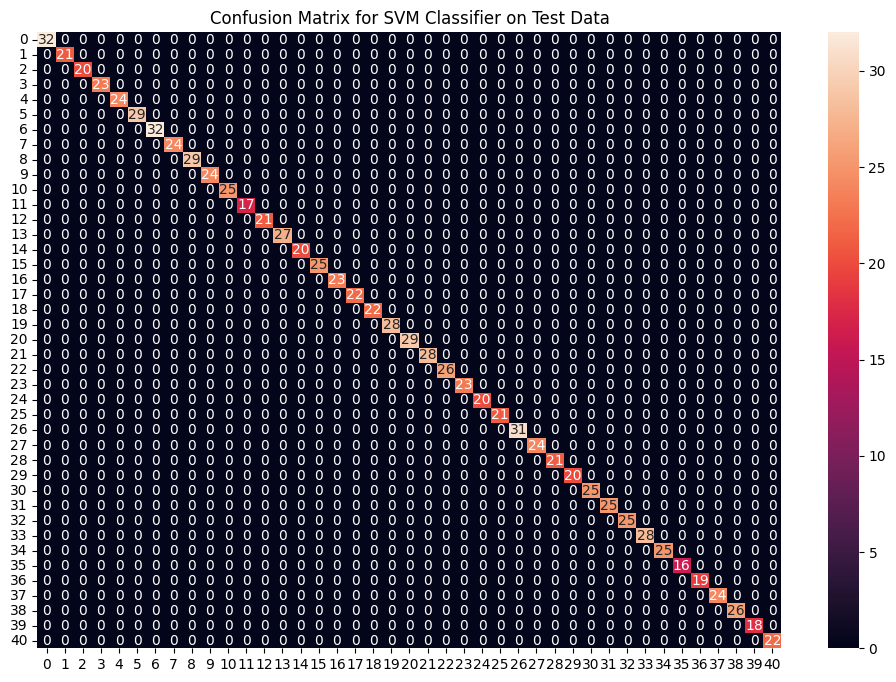

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


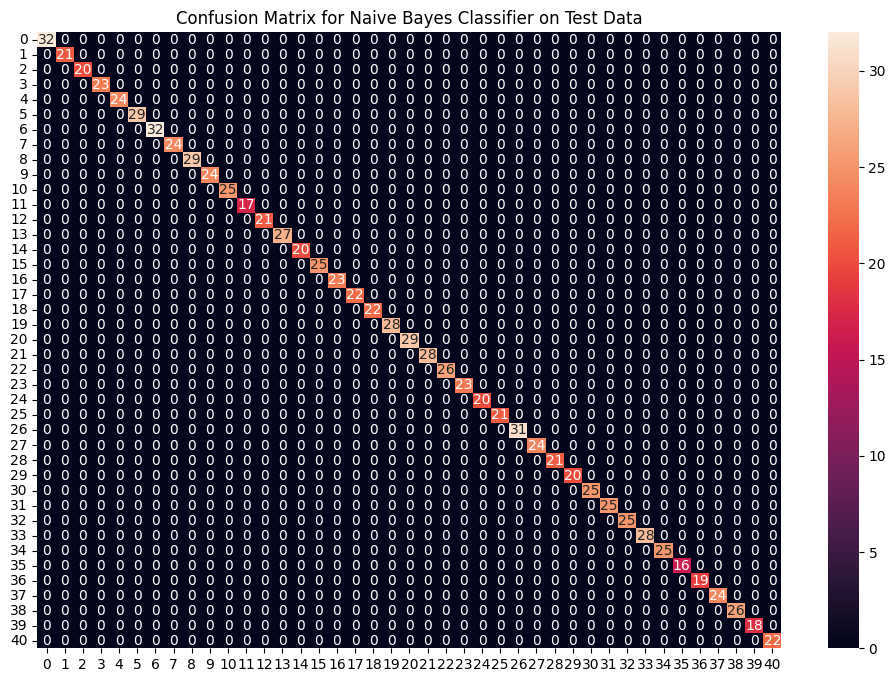

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


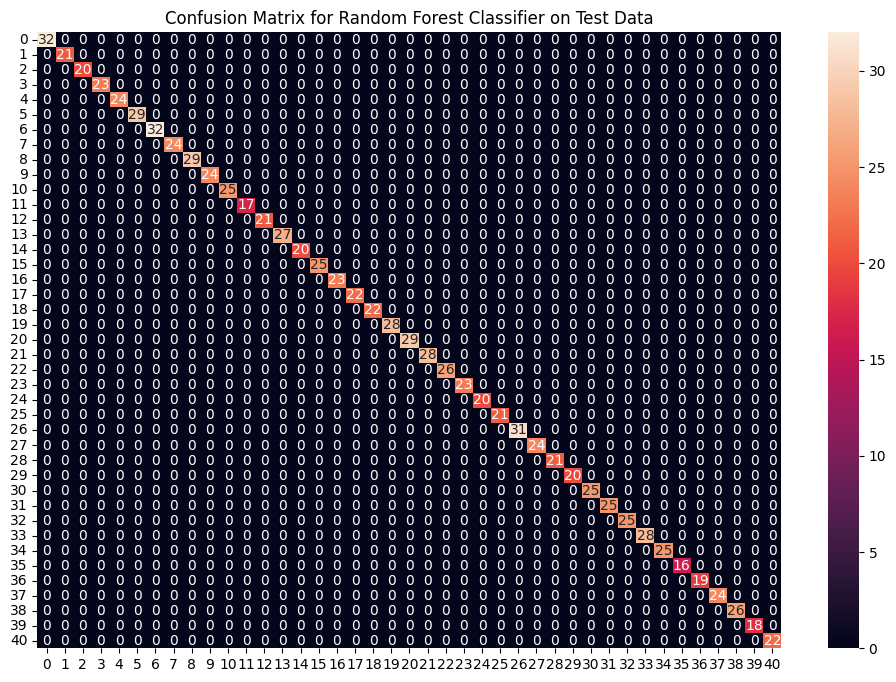

In [8]:
# Building robust classifier by combining all models
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


Fitting the model on whole data and validating on the Test dataset

Accuracy on Test dataset by the combined model: 100.0


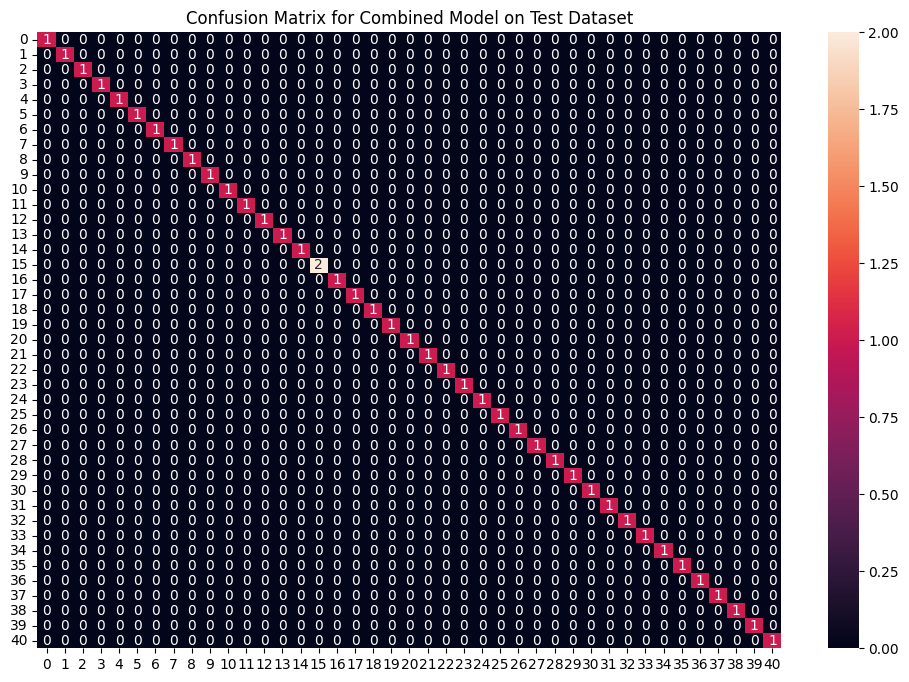

In [10]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("data/testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

We can see that our combined model has classified all the data points accurately. 

Creating a function that can take symptoms as input and generate predictions for disease 

In [14]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function with example
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

# Note: The symptoms that are given as input to the function should be exactly the same among the 132 symptoms in the dataset.

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


Ensemble model that combines multiple models into one with VotingClassifier

In [15]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', final_rf_model),
        ('nb', final_nb_model),
        ('svm', final_svm_model)
    ],
    voting='hard'  # or 'soft' for probability-based voting
)

Train the VotingClassifier

In [16]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=18)),
                             ('nb', GaussianNB()), ('svm', SVC())])

Save the VotingClassifier using joblib

In [17]:
import joblib

joblib.dump(voting_clf, 'voting_classifier.pkl')

['voting_classifier.pkl']

Load the VotingClassifier

In [18]:
voting_clf = joblib.load('voting_classifier.pkl')

Use the voting classifier to make predictions

In [19]:
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating the final prediction using the voting classifier
    final_prediction = data_dict["predictions_classes"][voting_clf.predict(input_data)[0]]
    
    return {
        "final_prediction": final_prediction
    }

TEST

In [38]:
symptoms = "Itching,Skin Rash,Nodal Skin Eruptions"
test = predictDisease(symptoms=symptoms)
print(test)

{'final_prediction': 'Fungal infection'}
